In [1]:
!pip install shap

     |████████████████████████████████| 327kB 6.9MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456463 sha256=eed81bd87e58cbebd3256d8ce2e923ae822643c1aac569dd18d50de5d1596d60
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [2]:
# this is the code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import shap
import numpy as np

import matplotlib.pyplot as plt

In [3]:
batch_size = 128
num_classes = 10
epochs = 24

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
keras.utils.to_categorical(y_train[:2], num_classes)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [24]:
np.squeeze(x_train)[0].shape

(28, 28)

In [30]:
np.squeeze(x_train)[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

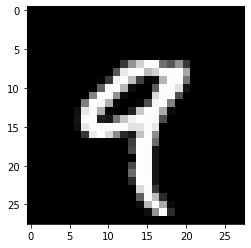

In [29]:
plt.imshow(np.squeeze(x_train)[4], cmap='gray')

In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/24
469/469 [==============================] - 7s 14ms/step - loss: 2.2864 - accuracy: 0.1392 - val_loss: 2.2525 - val_accuracy: 0.3703
Epoch 2/24
469/469 [==============================] - 6s 14ms/step - loss: 2.2317 - accuracy: 0.2466 - val_loss: 2.1864 - val_accuracy: 0.5296
Epoch 3/24
469/469 [==============================] - 6s 14ms/step - loss: 2.1631 - accuracy: 0.3440 - val_loss: 2.0972 - val_accuracy: 0.6245
Epoch 4/24
469/469 [==============================] - 6s 14ms/step - loss: 2.0683 - accuracy: 0.4347 - val_loss: 1.9745 - val_accuracy: 0.7005
Epoch 5/24
469/469 [==============================] - 6s 14ms/step - loss: 1.9420 - accuracy: 0.5048 - val_loss: 1.8115 - val_accuracy: 0.7527
Epoch 6/24
469/469 [==============================] - 6s 14ms/step - loss: 1.7892 - accuracy: 0.5552 - val_loss: 1.6154 - val_accuracy: 0.7828
Epoch 7/24
469/469 [==============================] - 6s 14ms/step - loss: 1.6116 - accuracy: 0.5965 - val_loss: 1.4054 - val_accuracy: 0.7984

In [10]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


keras is no longer supported, please use tf.keras instead.


In [13]:
len(shap_values)

10

In [41]:
np.array(shap_values).shape

(10, 4, 28, 28, 1)

In [39]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5], labels=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

AssertionError: ignored

In [31]:
?shap.image_plot